In [6]:
import random
import math
LIMIT = 10

In [7]:
def update_temperature(T, k):
    return T - 0.001

def get_neighbors(i, L):
    assert L > 1 and i >= 0 and i < L
    if i == 0:
        return [1]
    elif i == L-1:
        return [L-2]
    else:
        return [i-1, i+1]
    
def make_move(x, A, T):
    nhb = random.choice(range(len(A)))
    
    delta = A[nhb] - A[x]
    
    if delta < 0:
        return nhb
    else:
        p = math.exp(-delta/T)
        return nhb if random.random() < p else x
    
def simulated_annealing(A):
    L = len(A)
    x0 = random.choice(range(L))
    T = 1.
    k = 1
    
    x = x0
    x_best = x0
    
    while T > 1e-3:
        x = make_move(x, A, T)
        if(A[x] < A[x_best]):
            x_best = x
        T = update_temperature(T, k)
        k += 1
    
    print("Iterations: {}".format(k))
    return x, x_best, x0

def isminima_local(p, A):
    return all(A[p] < A[i] for i in get_neighbors(p, len(A)))

def func(x):
    return math.sin((2*math.pi/LIMIT)*x) + 0.001*random.random()

def initialize(L):
    return list(map(func, range(L)))

In [16]:
import matplotlib.pyplot as plt
import numpy as np

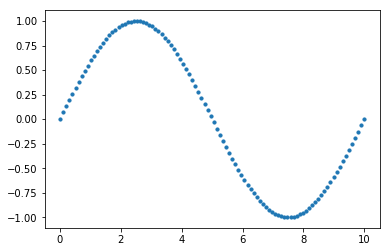

In [559]:
X = np.linspace(0.01, LIMIT, 100)
y = np.array([func(x) for x in X])
plt.scatter(X, y, s=10)
plt.show()

In [562]:
def simulated_annealing(y):
    T = 1.
    idx0 = random.choice(indices)
    k = 1
    
    idx = x0
    idx_best = x0
    
    while T > 1e-3:
        idx = make_move(idx, y, T)
        if(y[idx] < y[idx_best]):
            idx_best = idx
        T = update_temperature(T)
        k += 1
    
    return idx, idx_best, idx0

def update_temperature(T):
    return T - 0.001

def get_neighbors(idx):
    assert idx < len(y) and idx >= 0
    if idx == 0:
        return np.array([idx+1])
    elif idx == len(y)-1:
        return np.array([idx-1])
    else:
        return np.array([idx-1, idx+1])
    
def make_move(idx, y, T):
    nhb = random.choice(indices)
    delta = y[nhb] - y[idx]
    if delta < 0:
        return nhb
    else:
        p = math.exp(-delta/T)
        return nhb if random.random() < p else idx
    
def isminima_local(idx, y):
    return (y[indices[idx]] < y[get_neighbors(indices[idx])]).all()
    
    
indices = np.arange(y.shape[0])
local_minima = []
for idx in indices:
    if(isminima_local(idx, y)):
        local_minima.append([idx, y[idx]])
        
x = 0
y2 = y[x]
for xi, yi in enumerate(y):
    if yi < y2:
        x = xi
        y2 = yi
global_minimum = x

In [569]:
x, x_best, x0 = simulated_annealing(y)